In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *
from speechsep.base import *

In [ ]:
files = get_audio_files("../data/esc50_sample/")

In [ ]:
len(files)

80

In [ ]:
audios = [AudioMono.create(fn) for fn in files[:1]]

In [ ]:
sample = audios[0]

In [ ]:
def has_inf(arr):
    np.isinf(np.sum(arr))

/home/holydemon/dev/Speech-Separation/nbdev/speechsep/core.py:93: RuntimeWarning: divide by zero encountered in log10
  new_data = np.log10(spec.data)#.filled(-5)


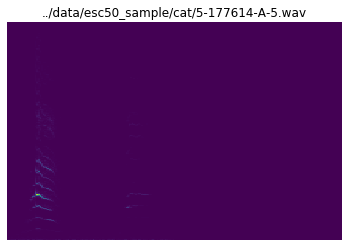

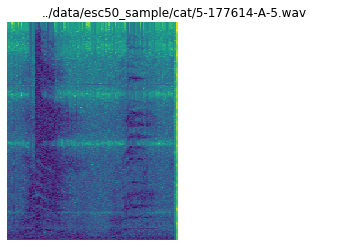

In [ ]:
#for a in audios[:10]:
for a in audios[:1]:
    spec = Spectify()(a)
    spec.show(title = a.fn)
    dspec = Decibelify()(spec)
    dspec.data = dspec.data
    dspec.show(title = a.fn)

In [ ]:
#export
class Decibelify2(Transform):
    def encodes(self,spec:SpecBase):
        new_data = np.log10(spec.data)
        noise_mag = np.random.random(new_data.shape)-2.5
        noise_dir = np.random.random(new_data.shape)*2 - 1
        noise = noise_mag+noise_dir*1j
        filtr = np.isinf(new_data)
        new_data = np.where(filtr, noise, new_data)
        return type(spec)(new_data, spec.sr, spec.fn)
        
    def decodes(self,spec:SpecBase):
        new_data = np.power(10, spec.data)
        return type(spec)(new_data, spec.sr, spec.fn)

/home/holydemon/.local/anaconda3/envs/fai2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


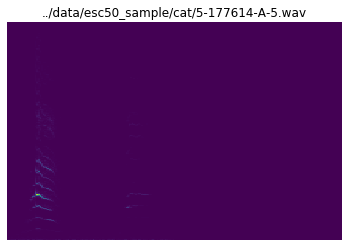

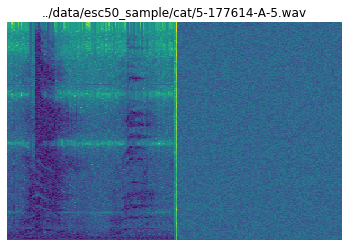

In [ ]:
#for a in audios[:10]:
for a in audios[:1]:
    spec = Spectify()(a)
    spec.show(title = a.fn)
    dspec = Decibelify2()(spec)
    dspec.data = dspec.data
    dspec.show(title = a.fn)

In [ ]:
dspec.data.shape

(1024, 214)

In [ ]:
print(dspec.data[200:210, 100:110])

[[-2.06191037-0.48239866j -1.77627912-0.92120266j -1.70514762-0.65250059j
  -1.92652491-0.95064877j -1.86500975-0.77341255j -1.91285424-0.66870841j
  -1.80725922+0.66272135j -3.7157661 +0.71022334j -4.37335152-0.72369738j
  -2.41978654-0.98373119j]
 [-1.77929879-1.08687529j -1.89817503+0.50583967j -1.68455232+0.90015468j
  -1.76588187+0.44901626j -1.9373348 +0.24528511j -2.1947547 +0.88201901j
  -1.83508559-0.46143267j -3.75883146+0.99858544j -4.37406983-0.78138915j
  -2.07025108+0.0130469j ]
 [-2.04533651+0.04604274j -2.00052906-0.35433483j -1.60107151-0.54461806j
  -1.83226508-0.65428072j -1.95562504+1.33016246j -2.0149513 -1.29949198j
  -1.92644588+1.18419277j -3.16207132-1.14659452j -4.38802029-0.83975668j
  -2.13578948-0.23795578j]
 [-2.53957307+0.73432769j -2.46578776+0.21749302j -1.84687035+0.32885787j
  -1.81717317-1.0278669j  -2.07351738-1.10476816j -2.53662426+0.65896566j
  -2.23929302-0.0341558j  -3.16757166+0.81365385j -4.4151022 -0.89552405j
  -1.53828202+0.76578362j]
 [-1